# w's fijos

In [2]:
library("pheatmap")
library('dplyr')
library('tidyr')
library('ggplot2')
library('abind')
library('deSolve')
library('corrplot')
library('matrixcalc')
library('mbend')
library('readr')
library('nortest')
library('kableExtra')
library('flextable')

In [ ]:
source('PortfolioFunctions_v7.R')

# Periodo 2013-2015

In [5]:
# Reading datasets
down.0 <- read.csv('df_down_1999.csv') %>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2013', paste('2010', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2014', paste('2011', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2015', paste('2012', substring(Date,5,10), sep=''),'')))))

ftse100.0 <- read.csv('df_FTSE_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2013', paste('2010', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2014', paste('2011', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2015', paste('2012', substring(Date,5,10), sep=''),'')))))

dax.0 <- read.csv('df_DAX_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2013', paste('2010', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2014', paste('2011', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2015', paste('2012', substring(Date,5,10), sep=''),'')))))

sp500.0 <- read.csv('df_S&P500_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2013', paste('2010', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2014', paste('2011', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2015', paste('2012', substring(Date,5,10), sep=''),'')))))

nasdaq.0 <- read.csv('df_NASDAQ_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>%  
  select(-HSKA) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2013', paste('2010', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2014', paste('2011', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2015', paste('2012', substring(Date,5,10), sep=''),'')))))

nasdaqETF.0 <- read.csv('df_NASDAQ.ETF_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2013', paste('2010', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2014', paste('2011', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2015', paste('2012', substring(Date,5,10), sep=''),'')))))

nyse.0 <- read.csv('df_NYSE_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  select(-AIG, -BAC, -AEG, -BIG, -BDN, -BBVA, -AWR, -AME, -AFL) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% 
  mutate(Date = as.Date(ifelse(substring(Date,1,4)=='2013', paste('2010', substring(Date,5,10), sep=''),
                          ifelse(substring(Date,1,4)=='2014', paste('2011', substring(Date,5,10), sep=''),
                            ifelse(substring(Date,1,4)=='2015', paste('2012', substring(Date,5,10), sep=''),'')))))


In [6]:
# Reading datasets
down.1 <- read.csv('df_down_1999.csv') %>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01')

ftse100.1 <- read.csv('df_FTSE_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01')

dax.1 <- read.csv('df_DAX_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') 


sp500.1 <- read.csv('df_S&P500_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%Y-%m-%d")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') 

nasdaq.1 <- read.csv('df_NASDAQ_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% 
  select(-HSKA)

nasdaqETF.1 <- read.csv('df_NASDAQ.ETF_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') 

nyse.1 <- read.csv('df_NYSE_1999.csv')%>%
  mutate(Date=as.Date(Date, format = "%d/%m/%Y")) %>% 
  filter(Date >= '2013-01-01', Date < '2016-01-01') %>% select(-AIG, -BAC, -AEG, -BIG, -BDN, -BBVA, -AWR, -AME, -AFL)


In [7]:
# Reading datasets
down <- rbind(down.0, down.1) %>% filter(!is.na(Date))
ftse100 <- rbind(ftse100.0, ftse100.1) %>% filter(!is.na(Date))
dax <- rbind(dax.0, dax.1) %>% filter(!is.na(Date))
sp500 <- rbind(sp500.0, sp500.1) %>% filter(!is.na(Date))
nasdaq <- rbind(nasdaq.0, nasdaq.1) %>% filter(!is.na(Date))
nasdaqETF <- rbind(nasdaqETF.0, nasdaqETF.1) %>% filter(!is.na(Date))
nyse <- rbind(nyse.0, nyse.1) %>% filter(!is.na(Date))

In [ ]:
################################################################################
######   This code generarte the dataset for multiple cases listed below   #####
################################################################################
# iterates the first k stocks: from 6 to 10
#top_vect <- 6:10
top_vect <- 6:10
# iterates the period of rebalance (in months)
period <- c(36)
# iterates the type of sort from k stocks
sort <- c('mean', 'sr')
# iterates the type of covariance matrix
matrix <- c('var')
# iterates the list od dataset
df_completed <- list('down' = down, 
                     'ftse100' = ftse100,
                     'dax'= dax,
                     'sp500' = sp500, 
                     'nasdaq' = nasdaq,
                     'nasdaqETF' = nasdaqETF,
                     'nyse'= nyse)

# iterates the respective year for each dataset
years_start <- c('2013', '2013', '2013', '2013', '2013', '2013', '2013')
# initial datasets
base.portfolio.ret1 <- NULL
base.portfolio.cum.ret1 <- NULL
# loop for all the iterators
for(j in 1:length(df_completed)){
  for(k in 1:length(period)){
    for(l in 1:length(sort)){
      for(m in 1:length(matrix)){
        for(i in 1:length(top_vect)){
        # mean variance portfolio  
        port.m <- getPortfolio(base = df_completed[[j]], 
                                year_to_start = years_start[j], 
                                rebalance_period = period[k], 
                                mod = matrix[m], 
                                sorted= sort[l] , 
                                top.k = top_vect[i])
        # Min portfolio returns
        names <- c('date', 'sorted_by', 'rebalance_period', 'base', 'top', 'matrix' ,'min.port.ret')
        portfolio.ret <- data.frame('date' = port.m$df.port.ret$date,
                                    'sorted_by' = sort[l],
                                    'rebalance_period' = period[k],
                                    'base' = names(df_completed)[j],
                                    'top' = top_vect[i],
                                    'matrix' = matrix[m],
                                    'min.port.ret'= port.m$df.port.ret$min.ret) 
        # Cummulative returns
        port.cum.ret <- portfolio.ret %>%
          mutate('cum.port' = cumsum(min.port.ret)) %>%
          dplyr::select(-min.port.ret)
        ## colnames
        colnames(portfolio.ret) <- names
        colnames(port.cum.ret) <- names 
        # join tables
        base.portfolio.ret1 <- rbind(base.portfolio.ret1, portfolio.ret)
        base.portfolio.cum.ret1 <- rbind(base.portfolio.cum.ret1, port.cum.ret)
        # remove from the work space
        rm(portfolio.ret, port.cum.ret)
        }
      }
    }
  }
}

In [10]:
# Modelo exponencial
saveRDS(base.portfolio.ret1, './base.portfolio.ret.2013_2015_exp.rds')
saveRDS(base.portfolio.cum.ret1, './base.portfolio.cum.ret.2013_2015_exp.rds')

In [4]:
# lectura de 3 modelos
base.portfolio.ret1 <- readRDS('./base.portfolio.ret.2013_2015.rds')
base.portfolio.cum.ret1 <- readRDS('./base.portfolio.cum.ret.2013_2015.rds')

# lectura de modelo exponencial
base.portfolio.ret2 <- readRDS('./base.portfolio.ret.2013_2015_exp.rds') %>%
    mutate(matrix='exp')
base.portfolio.cum.ret2 <- readRDS('./base.portfolio.cum.ret.2013_2015_exp.rds') %>%
    mutate(matrix='exp')

# unión de bases
base.portfolio.ret1  <- rbind(base.portfolio.ret1, base.portfolio.ret2)
base.portfolio.cum.ret1  <- rbind(base.portfolio.cum.ret1, base.portfolio.cum.ret2)

In [5]:
head(base.portfolio.ret1) 

,date,sorted_by,rebalance_period,base,top,matrix,min.port.ret
,<date>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,2013-01-02,mean,36,down,6,mv,-1.325290467
2,2013-01-03,mean,36,down,6,mv,-0.003410238
3,2013-01-04,mean,36,down,6,mv,0.003405992
4,2013-01-07,mean,36,down,6,mv,-0.012676276
5,2013-01-08,mean,36,down,6,mv,-0.019422312
6,2013-01-09,mean,36,down,6,mv,0.027857013


In [7]:
# Change labels
base.portfolio.ret <- base.portfolio.ret1 %>% 
   filter(sorted_by=='mean') %>% 
   mutate(base = ifelse(base == 'down', 'DJIA', 
                            ifelse(base == 'ftse100', 'FTSE100', 
                                   ifelse(base == 'dax', 'DAX', 
                                          ifelse(base == 'nasdaq', 'NASDAQ',
                                                 ifelse(base == 'sp500', 'S&P500',
                                                        ifelse(base == 'nasdaqETF', 'NASDAQ (ETFs)',
                                                               ifelse(base == 'nyse', 'NYSE', ''))))))))

# cum ret
base.portfolio.cum.ret <- base.portfolio.cum.ret1 %>% 
   filter(sorted_by=='mean') %>% 
   mutate(base = ifelse(base == 'down', 'DJIA', 
                            ifelse(base == 'ftse100', 'FTSE100', 
                                   ifelse(base == 'dax', 'DAX', 
                                          ifelse(base == 'nasdaq', 'NASDAQ',
                                                 ifelse(base == 'sp500', 'S&P500',
                                                        ifelse(base == 'nasdaqETF', 'NASDAQ (ETFs)',
                                                               ifelse(base == 'nyse', 'NYSE', ''))))))))

In [8]:
base.port.ret.by_year <- base.portfolio.ret %>% 
    mutate('year'=as.numeric(substring(date,1,4))) %>% 
    select(-date, -sorted_by, -rebalance_period) %>% 
    rename('Index'=base, 'Stocks_Selected'=top, 'Method'=matrix, 'Year'=year)

In [9]:
base.ret <- base.port.ret.by_year %>%
  group_by(Year, Index, Stocks_Selected, Method) %>% 
  summarize('mean'=mean(min.port.ret),
            'sd' = sd(min.port.ret),
            'sr' = mean/sd) %>%
  ungroup() %>%
  data.frame() %>% 
  arrange(Year, Index, Stocks_Selected, desc(sr)) %>% 
  mutate(Method = ifelse(Method == 'mv','var-cov', 
                    ifelse(Method == 'cor', 'cor',
                      ifelse(Method == 'var', 'var', 
                        ifelse(Method == 'exp', 'exp','')))))


`summarise()` has grouped output by 'Year', 'Index', 'Stocks_Selected'. You can override using the `.groups` argument.



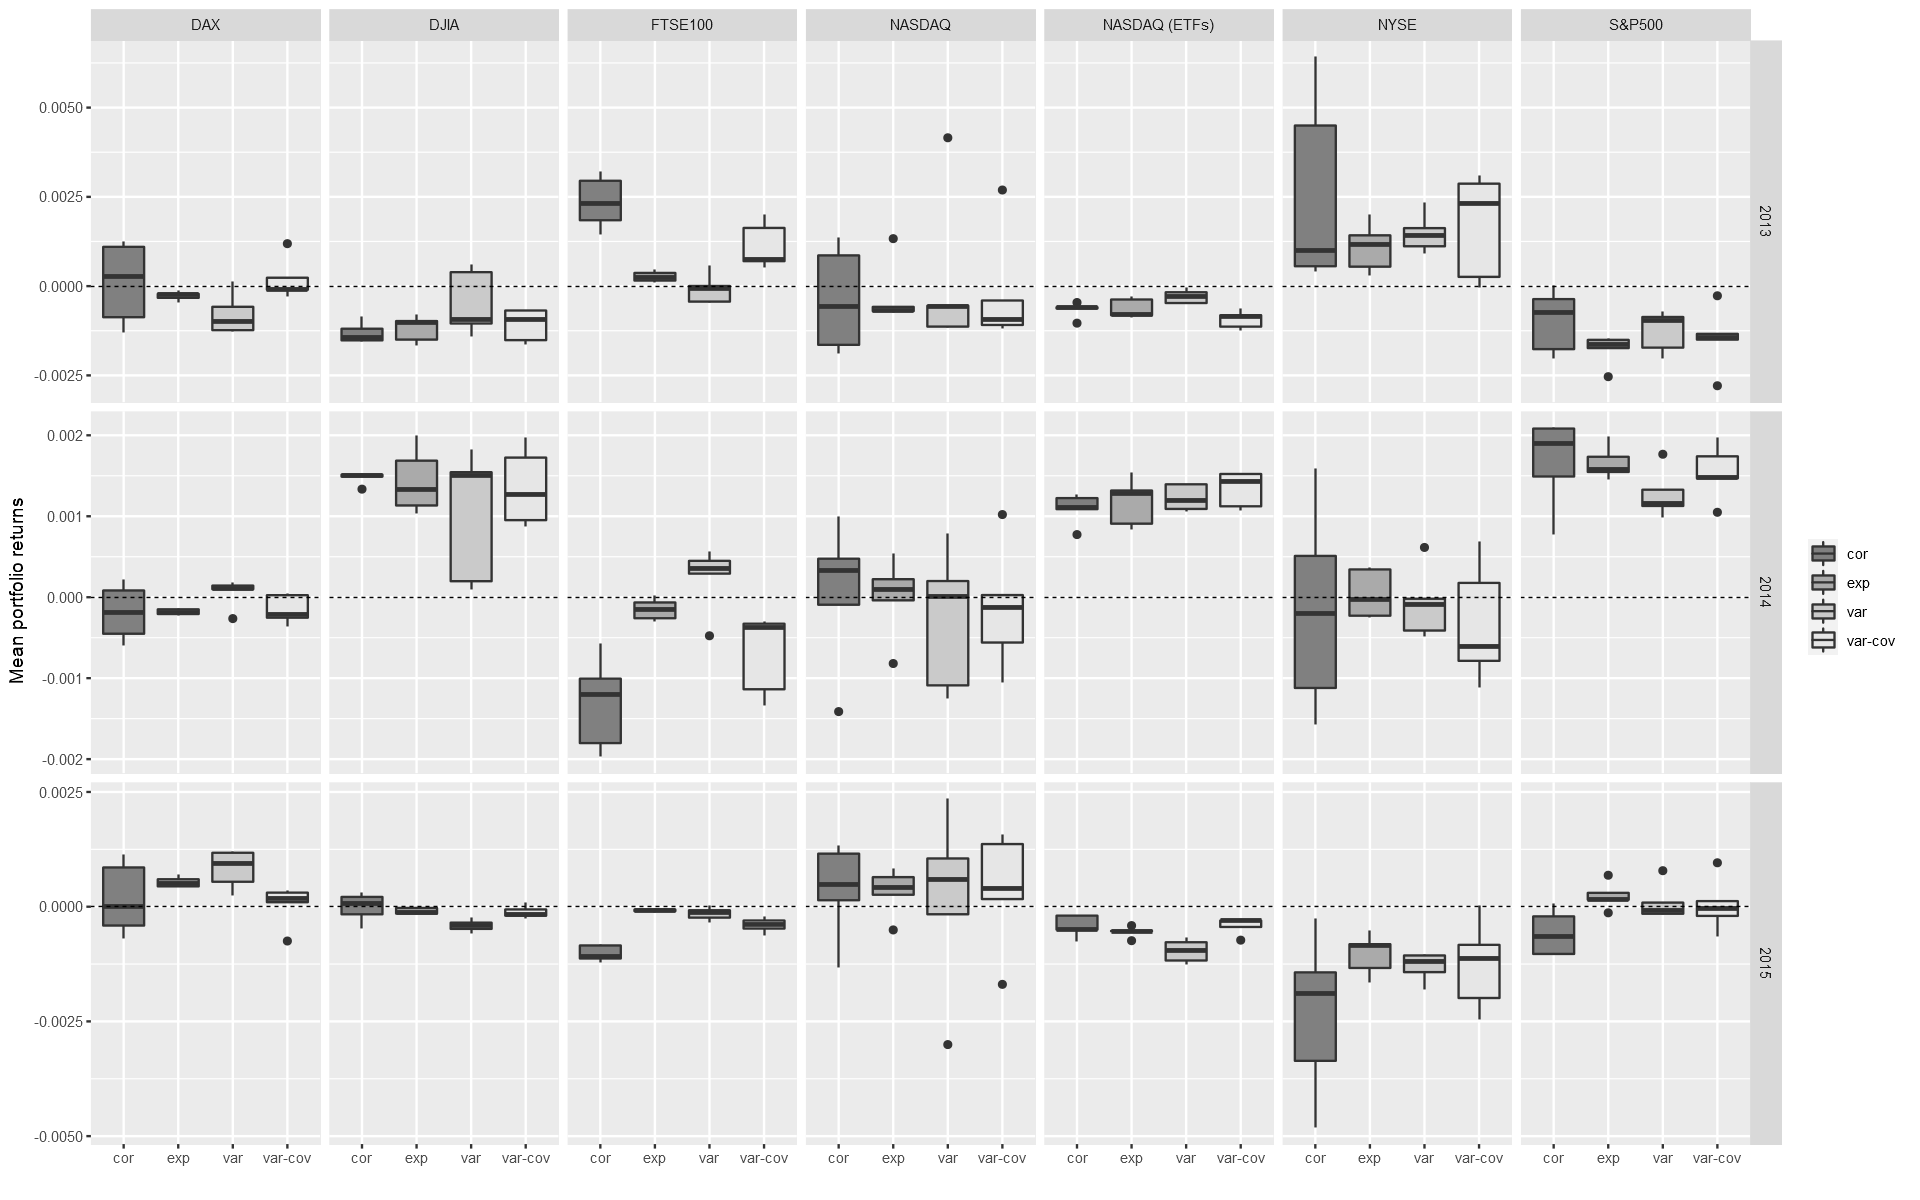

In [10]:
options(repr.plot.width=16, repr.plot.height=10)
b1 <- ggplot(base.ret, aes(x=Method, y=mean, fill=Method)) +
  geom_boxplot() +
  #theme_bw() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  facet_grid(col=vars(Index), row=vars(Year), scale='free') +
  labs(y="Mean portfolio returns", x="") +
  theme(#legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_fill_grey(start=0.5, end=0.9)
b1

In [23]:
png(file="./PortfolioReturns_2013_2015_completed.png",width=1000, height=600)
b1
dev.off()

png 
  2

# Cumulative returns

In [11]:
base.cum.ret <- base.portfolio.cum.ret %>% filter(sorted_by=='mean') %>% 
    mutate(matrix = ifelse(matrix=='mv', 'var-cov', 
                        ifelse(matrix =='cor', 'cor',
                            ifelse(matrix=='var', 'var', 'exp'))))
head(base.cum.ret)

,date,sorted_by,rebalance_period,base,top,matrix,min.port.ret
,<date>,<chr>,<dbl>,<chr>,<int>,<chr>,<dbl>
1,2013-01-02,mean,36,DJIA,6,var-cov,-1.325290
2,2013-01-03,mean,36,DJIA,6,var-cov,-1.328701
3,2013-01-04,mean,36,DJIA,6,var-cov,-1.325295
4,2013-01-07,mean,36,DJIA,6,var-cov,-1.337971
5,2013-01-08,mean,36,DJIA,6,var-cov,-1.357393
6,2013-01-09,mean,36,DJIA,6,var-cov,-1.329536


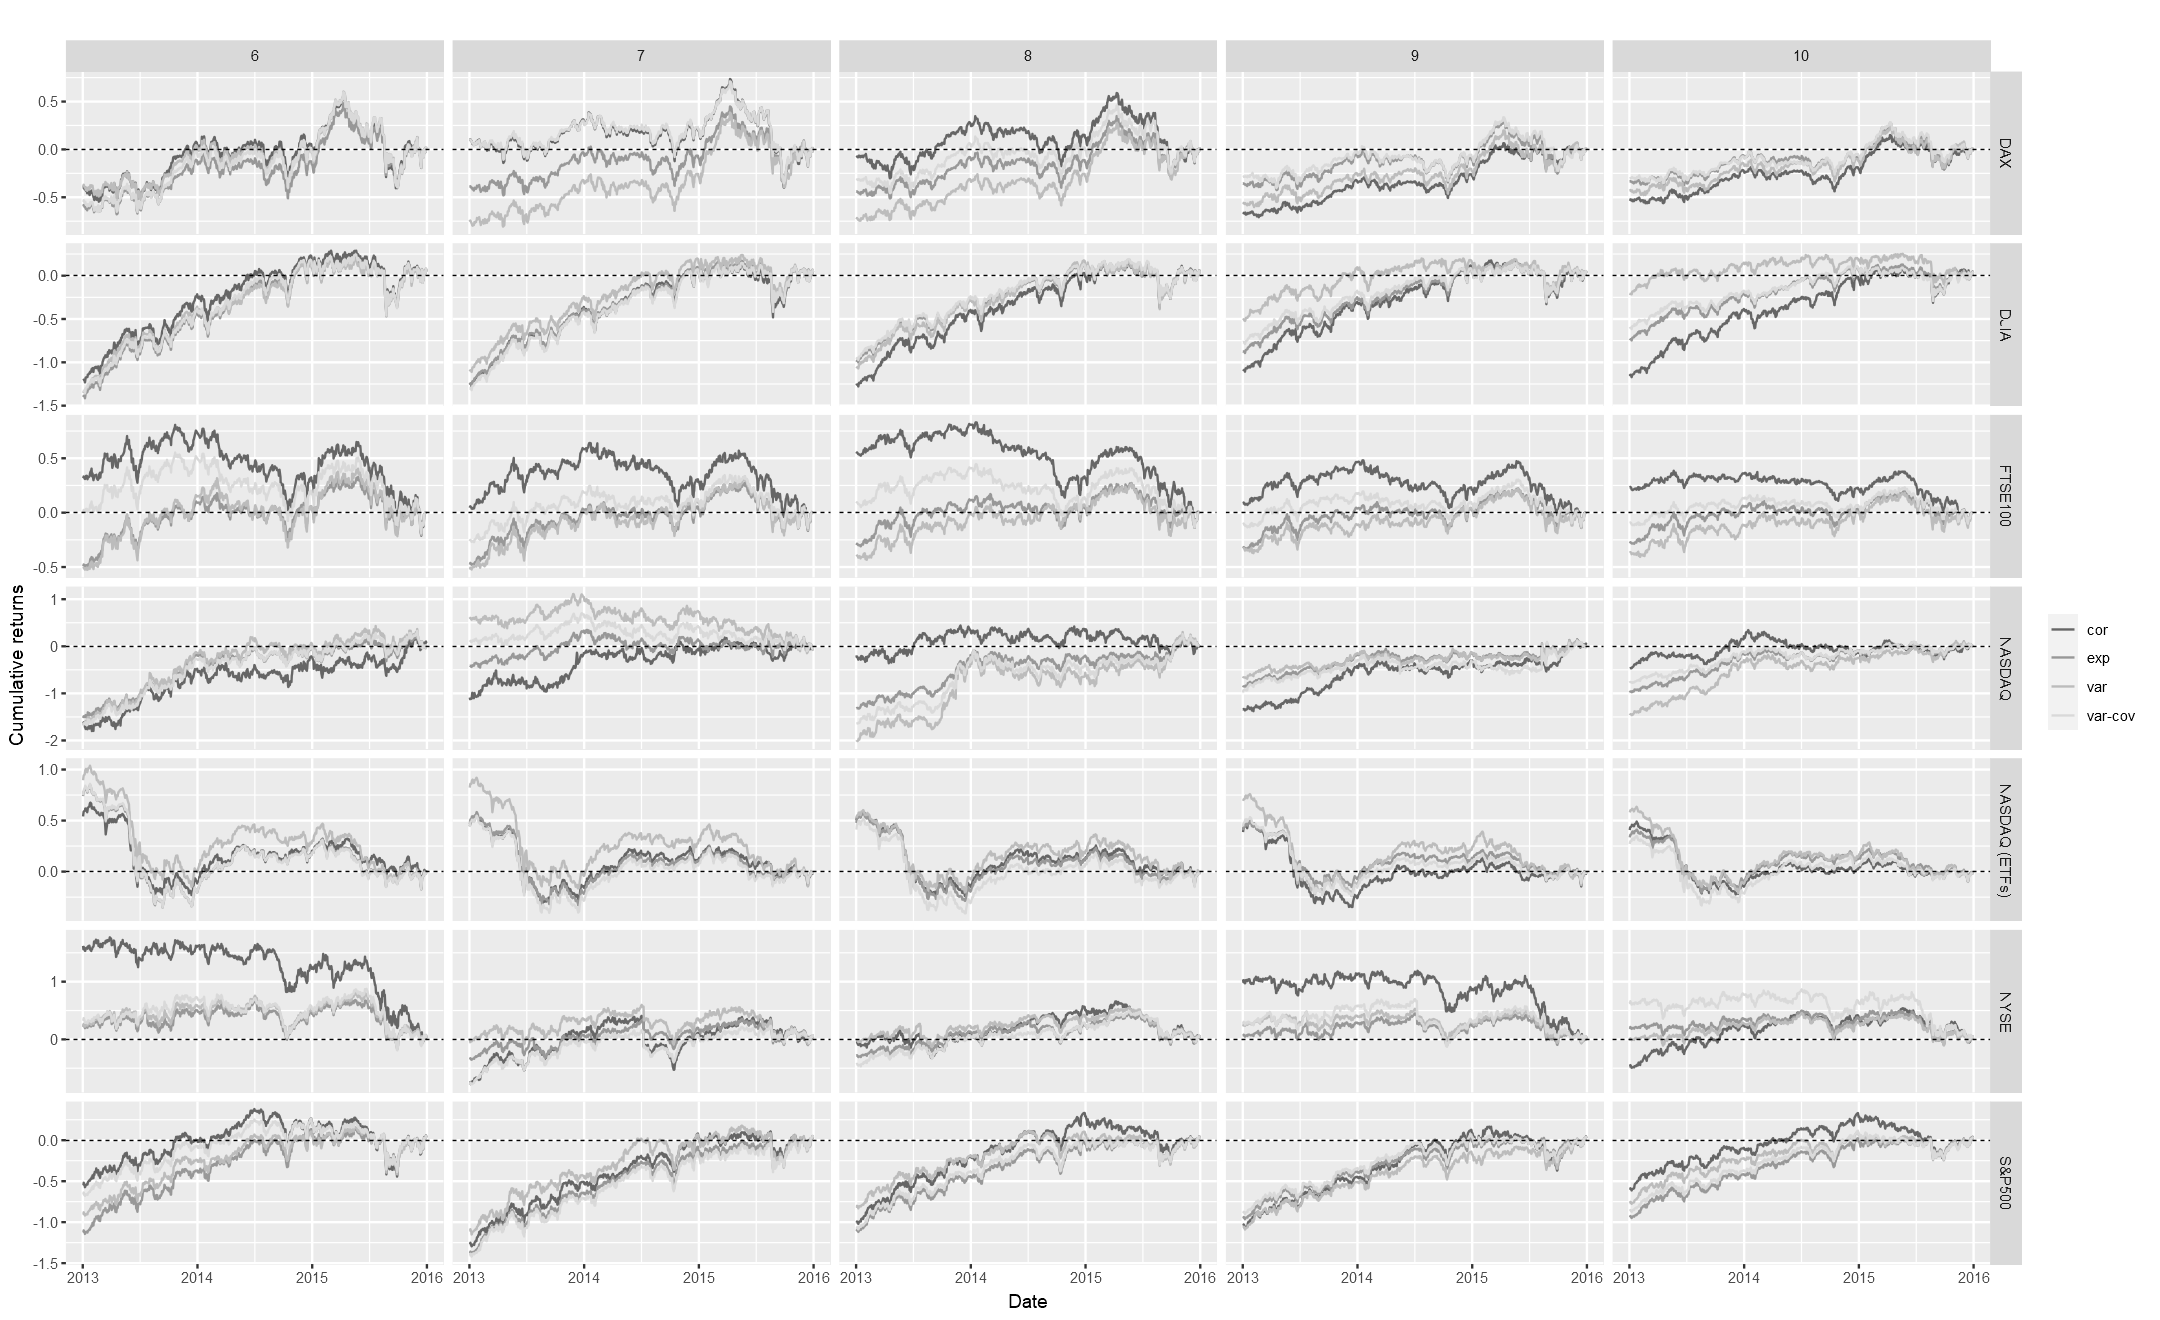

In [12]:
# Cumulative returns
options(repr.plot.width=18, repr.plot.height=11)
p4 <- ggplot(base.cum.ret  , aes(x=date,y=min.port.ret,color=matrix) )+
  geom_line(size=0.5) +
  #theme_bw() +
  #theme_minimal() +
  geom_hline(yintercept=0, linetype="dashed", color = "black", size=0.3) +
  labs(title="",x='Date',y='Cumulative returns') +
  #facet_grid(top ~ .) +
  facet_grid(col=vars(top), row=vars(base), scale="free") +
  theme(#legend.position="none",
        legend.box = "horizontal",
        legend.title = element_blank()) +
  scale_color_grey(start=0.4, end=0.85)
p4

In [25]:
png(file="./PortfolioCumulativeReturns_2013_2015_completed.png",width=1000, height=600)
p4
dev.off()

png 
  2

# Test

In [ ]:
combinations <- list(c('mv', 'cor'), 
                     c('mv', 'var'), 
                     c('mv', 'exp'), 
                     c('cor', 'var'), 
                     c('cor', 'exp'), 
                     c('var', 'exp'))


In [14]:
#*********   t test
summary.port.ret_1 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[1]]) %>% 
  select(-sorted_by) %>%     
  group_by(base, top, matrix) %>% 
  summarise(mean = round(mean(min.port.ret),6),
            sd = round(sd(min.port.ret),6)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación mv-cor
t.test_1 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[1]]) %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(mv), unlist(cor), var.equal=FALSE)$statistic,4),
         p_value = round(t.test(unlist(mv), unlist(cor), var.equal=FALSE)$p.value,4)) %>% 
  select(-mv, -cor) %>% 
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_1 <- summary.port.ret_1 %>% 
  merge(t.test_1, by=c('base', 'top')) %>% 
  arrange(base, top)  %>% 
  unite('Mean', mean_mv,mean_cor, sep='/') %>% 
  unite('Sd', sd_mv,sd_cor, sep='/') %>% 
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='mv-cor') %>% 
  select(base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)


  colnames(table_summary_1) <- c('Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.



In [15]:
#*********   t test
summary.port.ret_2 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[2]]) %>% 
  select(-sorted_by) %>%     
  group_by(base, top, matrix) %>% 
  summarise(mean = round(mean(min.port.ret),6),
            sd = round(sd(min.port.ret),6)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación mv-var
t.test_2 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[2]]) %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(mv), unlist(var), var.equal=FALSE)$statistic,4),
         p_value = round(t.test(unlist(mv), unlist(var), var.equal=FALSE)$p.value,4)) %>% 
  select(-mv, -var) %>% 
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_2 <- summary.port.ret_2 %>% 
  merge(t.test_2, by=c('base', 'top')) %>% 
  arrange(base, top)  %>% 
  unite('Mean', mean_mv, mean_var, sep='/') %>% 
  unite('Sd', sd_mv, sd_var, sep='/') %>% 
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='mv-var') %>% 
  select(base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)


  colnames(table_summary_2) <- c('Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.



In [16]:
#*********   t test
summary.port.ret_3 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[3]]) %>% 
  select(-sorted_by) %>%     
  group_by(base, top, matrix) %>% 
  summarise(mean = round(mean(min.port.ret),6),
            sd = round(sd(min.port.ret),6)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación mv-exp
t.test_3 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[3]]) %>% 
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(mv), unlist(exp), var.equal=FALSE)$statistic,4),
         p_value = round(t.test(unlist(mv), unlist(exp), var.equal=FALSE)$p.value,4)) %>% 
  select(-mv, -exp) %>% 
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_3 <- summary.port.ret_3 %>% ###################
  merge(t.test_3, by=c('base', 'top')) %>% ##################
  arrange(base, top)  %>% 
  unite('Mean', mean_mv, mean_exp, sep='/') %>% ###############
  unite('Sd', sd_mv, sd_exp, sep='/') %>% ################
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='mv-exp') %>%  ##################
  select(base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)


  colnames(table_summary_3) <- c('Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.



In [17]:
#*********   t test
summary.port.ret_4 <- base.portfolio.ret %>%  ######################
  filter(matrix %in% combinations[[4]]) %>%   #####################
  select(-sorted_by) %>%     
  group_by(base, top, matrix) %>% 
  summarise(mean = round(mean(min.port.ret),6),
            sd = round(sd(min.port.ret),6)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación mv-var
t.test_4 <- base.portfolio.ret %>%   #######################
  filter(matrix %in% combinations[[4]]) %>%  #################
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(cor), unlist(var), var.equal=FALSE)$statistic,4),
         p_value = round(t.test(unlist(cor), unlist(var), var.equal=FALSE)$p.value,4)) %>% 
  select(-cor, -var) %>%  #####################
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_4 <- summary.port.ret_4 %>%   #################3
  merge(t.test_4, by=c('base', 'top')) %>%  ###################
  arrange(base, top)  %>% 
  unite('Mean', mean_cor, mean_var, sep='/') %>% ###############
  unite('Sd', sd_cor, sd_var, sep='/') %>%  ################
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='cor-var') %>% #################
  select(base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)


  colnames(table_summary_4) <- c('Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.



In [18]:
#*********   t test
summary.port.ret_5 <- base.portfolio.ret %>%  ######################
  filter(matrix %in% combinations[[5]]) %>%   #####################
  select(-sorted_by) %>%     
  group_by(base, top, matrix) %>% 
  summarise(mean = round(mean(min.port.ret),6),
            sd = round(sd(min.port.ret),6)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación cor-exp
t.test_5 <- base.portfolio.ret %>%   #######################
  filter(matrix %in% combinations[[5]]) %>%  #################
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(cor), unlist(exp), var.equal=FALSE)$statistic,4),
         p_value = round(t.test(unlist(cor), unlist(exp), var.equal=FALSE)$p.value,4)) %>% 
  select(-cor, -exp) %>%  #####################
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_5 <- summary.port.ret_5 %>%   #################3
  merge(t.test_5, by=c('base', 'top')) %>%  ###################
  arrange(base, top)  %>% 
  unite('Mean', mean_cor, mean_exp, sep='/') %>% ###############
  unite('Sd', sd_cor, sd_exp, sep='/') %>%  ################
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='cor-exp') %>% #################
  select(base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)


  colnames(table_summary_5) <- c('Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.



In [19]:
#*********   t test
summary.port.ret_6 <- base.portfolio.ret %>%  ######################
  filter(matrix %in% combinations[[6]]) %>%   #####################
  select(-sorted_by) %>%     
  group_by(base, top, matrix) %>% 
  summarise(mean = round(mean(min.port.ret),6),
            sd = round(sd(min.port.ret),6)) %>% 
  ungroup() %>% 
  pivot_wider(names_from = 'matrix', values_from=c('mean', 'sd')) %>% 
  data.frame()
  
# comparación var-exp
t.test_6 <- base.portfolio.ret %>%   #######################
  filter(matrix %in% combinations[[6]]) %>%  #################
  select(-sorted_by) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top, matrix) %>% 
  summarise(ret = list(min.port.ret)) %>% 
  pivot_wider(names_from = 'matrix', values_from='ret') %>% 
  group_by(base, top) %>% 
  mutate(t_statistic = round(t.test(unlist(var), unlist(exp), var.equal=FALSE)$statistic,4),
         p_value = round(t.test(unlist(var), unlist(exp), var.equal=FALSE)$p.value,4)) %>% 
  select(-var, -exp) %>%  #####################
  data.frame() %>% 
  mutate('sig'= ifelse(p_value < 0.05, "*", 
                      ifelse(p_value < 0.10, "**", 
                        ifelse(p_value < 0.15, "***", ""))))
  
table_summary_6 <- summary.port.ret_6 %>%   #################3
  merge(t.test_6, by=c('base', 'top')) %>%  ###################
  arrange(base, top)  %>% 
  unite('Mean', mean_var, mean_exp, sep='/') %>% ###############
  unite('Sd', sd_var, sd_exp, sep='/') %>%  ################
  #select(-mean_mv, -mean_var, -sd_mv, -sd_var) %>% 
  mutate('Comparison'='var-exp') %>% #################
  select(base, top, Comparison, Mean, Sd, t_statistic, p_value, sig)


  colnames(table_summary_6) <- c('Index', 'Stocks selected' , 'Comparison', 'Mean', 'Sd' ,'Statistic(t)', 'P-value', 'Sig')

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'base', 'top'. You can override using the `.groups` argument.



In [20]:
# Unión de tablas
merged_table <- rbind(table_summary_1, table_summary_2, table_summary_3,
                     table_summary_4, table_summary_5, table_summary_6) %>% 
    arrange(Index, across(starts_with('Stocks')),  Comparison)
head(merged_table)

,Index,Stocks selected,Comparison,Mean,Sd,Statistic(t),P-value,Sig
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,DAX,6,cor-exp,0.000032/0.000037,0.036142/0.03737,-0.0024,0.9981,
2,DAX,6,cor-var,0.000032/0.000039,0.036142/0.036282,-0.0038,0.9969,
3,DAX,6,mv-cor,0.000035/0.000032,0.038164/0.036142,0.0018,0.9986,
4,DAX,6,mv-exp,0.000035/0.000037,0.038164/0.03737,-0.0006,0.9995,
5,DAX,6,mv-var,0.000035/0.000039,0.038164/0.036282,-0.0019,0.9984,
6,DAX,6,var-exp,0.000039/0.000037,0.036282/0.03737,0.0014,0.9989,


# F table

In [21]:
head(summary.port.ret_1)

,base,top,mean_cor,mean_mv,sd_cor,sd_mv
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,DAX,6,0.000032,0.000035,0.036142,0.038164
2,DAX,7,0.000029,0.000026,0.029814,0.028702
3,DAX,8,0.000029,0.000027,0.025829,0.026676
4,DAX,9,0.000024,0.000024,0.028452,0.021969
5,DAX,10,0.000024,0.000018,0.024469,0.019265
6,DJIA,6,0.000064,0.000065,0.056015,0.059020


In [22]:
#*********   F test (compare two variances)
summary.F_1 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[1]]) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='mv-cor')  %>% 
  select(base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_1) <- c('Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'base'. You can override using the `.groups` argument.



In [23]:
#*********   F test (compare two variances)
summary.F_2 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[2]]) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='mv-var')  %>% 
  select(base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_2) <- c('Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'base'. You can override using the `.groups` argument.



In [24]:
#*********   F test (compare two variances)
summary.F_3 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[3]]) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='mv-exp')  %>% 
  select(base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_3) <- c('Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'base'. You can override using the `.groups` argument.



In [25]:
#*********   F test (compare two variances)
summary.F_4 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[4]]) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='cor-var')  %>% 
  select(base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_4) <- c('Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'base'. You can override using the `.groups` argument.



In [26]:
#*********   F test (compare two variances)
summary.F_5 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[5]]) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='cor-exp')  %>% 
  select(base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_5) <- c('Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'base'. You can override using the `.groups` argument.



In [27]:
#*********   F test (compare two variances)
summary.F_6 <- base.portfolio.ret %>% 
  filter(matrix %in% combinations[[6]]) %>% 
  mutate('year' = as.numeric(substring(date, 1, 4))) %>%
  group_by(base, top) %>% 
  summarise('F_statistic'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$statistic,4),
            'F_p.value'= round(var.test(min.port.ret~matrix, alternative='two.sided', ratio = 1)$p.value,4)) %>% 
  ungroup() %>% 
  mutate('sig'= ifelse(F_p.value < 0.05, "*", 
                      ifelse(F_p.value > 0.05 & F_p.value < 0.10, "**", 
                        ifelse(F_p.value > 0.10 & F_p.value < 0.15, "***", "")))) %>% 
  mutate('Comparison'='var-exp')  %>% 
  select(base, top, Comparison, F_statistic, F_p.value, sig)

colnames(summary.F_6) <- c('Index', 'Stocks selected' ,'Comparison', 'Statistic(F)', 'P-value', 'Sig.F')

`summarise()` has grouped output by 'base'. You can override using the `.groups` argument.



In [28]:
# Unión de tablas
merged_table_F <- rbind(summary.F_1, summary.F_2, summary.F_3, 
                        summary.F_4, summary.F_5, summary.F_6) %>% 
    arrange(Index, across(starts_with('Stocks')),  Comparison)
head(merged_table_F)

Index,Stocks selected,Comparison,Statistic(F),P-value,Sig.F
<chr>,<int>,<chr>,<dbl>,<dbl>,<chr>
DAX,6,cor-exp,0.9353,0.3583,
DAX,6,cor-var,0.9923,0.9152,
DAX,6,mv-cor,0.8968,0.1347,***
DAX,6,mv-exp,0.9588,0.5636,
DAX,6,mv-var,1.1064,0.1647,
DAX,6,var-exp,1.0609,0.4166,


In [29]:
# Table result
table_result <- merged_table %>% 
    merge(merged_table_F, by=c('Index', 'Stocks selected', 'Comparison')) %>% 
    mutate(Comparison = ifelse(Comparison == 'mv-cor', '(1)-(2)', 
                            ifelse(Comparison == 'mv-var', '(1)-(3)', 
                                ifelse(Comparison == 'mv-exp', '(1)-(4)', 
                                    ifelse(Comparison == 'cor-var', '(2)-(3)', 
                                        ifelse(Comparison == 'cor-exp', '(2)-(4)', 
                                            ifelse(Comparison == 'var-exp', '(3)-(4)', '')))))))  %>% 
    arrange(Index, across(starts_with('Stocks')), Comparison)                            

colnames(table_result) <- c('Index', 'Stocks selected', 'Comparison', 'Mean', 'Sd', 'Statistic(t)',	'P-value', 'Sig', 'Statistic(F)', 'P-value.', 'Sig.F')
 

In [29]:
head(table_result)

,Index,Stocks selected,Comparison,Mean,Sd,Statistic(t),P-value,Sig,Statistic(F),P-value.,Sig.F
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,DAX,6,(1)-(2),0.000035/0.000032,0.038164/0.036142,0.0018,0.9986,,0.8968,0.1347,***
2,DAX,6,(1)-(3),0.000035/0.000039,0.038164/0.036282,-0.0019,0.9984,,1.1064,0.1647,
3,DAX,6,(1)-(4),0.000035/0.000037,0.038164/0.03737,-0.0006,0.9995,,0.9588,0.5636,
4,DAX,6,(2)-(3),0.000032/0.000039,0.036142/0.036282,-0.0038,0.9969,,0.9923,0.9152,
5,DAX,6,(2)-(4),0.000032/0.000037,0.036142/0.03737,-0.0024,0.9981,,0.9353,0.3583,
6,DAX,6,(3)-(4),0.000039/0.000037,0.036282/0.03737,0.0014,0.9989,,1.0609,0.4166,


In [45]:
Latex_table <- table_result %>%
  kbl(format="latex",
      col.names = colnames(table_result),
      align="r",
      caption="Test", digits=4) %>%
  kable_minimal(full_width = F,  html_font = "Source Sans Pro")

In [ ]:
Latex_table

In [30]:
tab_result2 <- table_result %>% 
       mutate('Sd0'=Sd) %>% 
       separate(col=Sd,into=c('Sd1', 'Sd2'), sep='/') %>% 
       mutate('Var1'= as.numeric(Sd1)^2,
              'Var2'= as.numeric(Sd2)^2) %>% 
       mutate('Greater_Var'=ifelse(Var1 >  Var2, substring(Comparison,2,2),
                            ifelse(Var1 < Var2, substring(Comparison,6,6) ,''))) %>% 
       mutate('Greater_Var' = ifelse(Greater_Var == 1, 'cov', 
                                   ifelse(Greater_Var == 2, 'var.cor',
                                          ifelse(Greater_Var == 3, 'var',
                                                 ifelse(Greater_Var == 4, 'exp', ''))))) %>% 
       select(-Sd1, -Sd2) %>% 
       mutate(Sd=Sd0) %>% 
       select(-Sd0) %>% 
       select('Index', 'Stocks selected', 'Comparison', 'Mean', 'Sd', 'Statistic(t)','P-value', 'Sig', 'Statistic(F)', 'P-value.', 'Sig.F', everything()) 
head(tab_result2)

,Index,Stocks selected,Comparison,Mean,Sd,Statistic(t),P-value,Sig,Statistic(F),P-value.,Sig.F,Var1,Var2,Greater_Var
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,DAX,6,(1)-(2),0.000035/0.000032,0.038164/0.036142,0.0018,0.9986,,0.8968,0.1347,***,0.001456491,0.001306244,cov
2,DAX,6,(1)-(3),0.000035/0.000039,0.038164/0.036282,-0.0019,0.9984,,1.1064,0.1647,,0.001456491,0.001316384,cov
3,DAX,6,(1)-(4),0.000035/0.000037,0.038164/0.03737,-0.0006,0.9995,,0.9588,0.5636,,0.001456491,0.001396517,cov
4,DAX,6,(2)-(3),0.000032/0.000039,0.036142/0.036282,-0.0038,0.9969,,0.9923,0.9152,,0.001306244,0.001316384,var
5,DAX,6,(2)-(4),0.000032/0.000037,0.036142/0.03737,-0.0024,0.9981,,0.9353,0.3583,,0.001306244,0.001396517,exp
6,DAX,6,(3)-(4),0.000039/0.000037,0.036282/0.03737,0.0014,0.9989,,1.0609,0.4166,,0.001316384,0.001396517,exp


In [31]:
write.csv(tab_result2,'./Results_test_2013_2015.csv', row.names=F)

In [ ]:
t.final <- flextable(tab_result2)
t.final <- autofit(t.final)
save_as_image(t.final, path = "./Test_2013_2015_completed2.png")

# Frequency

In [31]:
head(tab_result2)

,Index,Stocks selected,Comparison,Mean,Sd,Statistic(t),P-value,Sig,Statistic(F),P-value.,Sig.F,Var1,Var2,Greater_Var
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,DAX,6,(1)-(2),0.000035/0.000032,0.038164/0.036142,0.0018,0.9986,,0.8968,0.1347,***,0.001456491,0.001306244,cov
2,DAX,6,(1)-(3),0.000035/0.000039,0.038164/0.036282,-0.0019,0.9984,,1.1064,0.1647,,0.001456491,0.001316384,cov
3,DAX,6,(1)-(4),0.000035/0.000037,0.038164/0.03737,-0.0006,0.9995,,0.9588,0.5636,,0.001456491,0.001396517,cov
4,DAX,6,(2)-(3),0.000032/0.000039,0.036142/0.036282,-0.0038,0.9969,,0.9923,0.9152,,0.001306244,0.001316384,var
5,DAX,6,(2)-(4),0.000032/0.000037,0.036142/0.03737,-0.0024,0.9981,,0.9353,0.3583,,0.001306244,0.001396517,exp
6,DAX,6,(3)-(4),0.000039/0.000037,0.036282/0.03737,0.0014,0.9989,,1.0609,0.4166,,0.001316384,0.001396517,exp


In [32]:
freq_result <- tab_result2 %>% 
    group_by(Index, Greater_Var) %>% 
    summarize(n = n()) %>% 
    arrange(Index,desc(n)) %>% 
    pivot_wider(names_from='Greater_Var', values_from='n', values_fill=0)
freq_result

`summarise()` has grouped output by 'Index'. You can override using the `.groups` argument.



Index,var,var.cor,exp,cov
<chr>,<int>,<int>,<int>,<int>
DAX,11,8,7,4
DJIA,4,10,10,6
FTSE100,14,8,8,0
NASDAQ,10,9,5,6
NASDAQ (ETFs),15,7,4,4
NYSE,3,13,2,12
S&P500,5,5,12,8
